**Name : Aishwarya Bhavsar** <br>
**CSULB : 029371509**<br>
**CECS 457 - Applied Machine Learning**<br>
**KNN**

# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# **Import dataset**

In [3]:
social_data = pd.read_csv('/content/Social_Network_Ads.csv')

# **Check the data types and numbers of rows and columns**

In [4]:
social_data.info

<bound method DataFrame.info of      Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]>

In [5]:
social_data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
social_data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# **Check missing values**

In [7]:
social_data.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

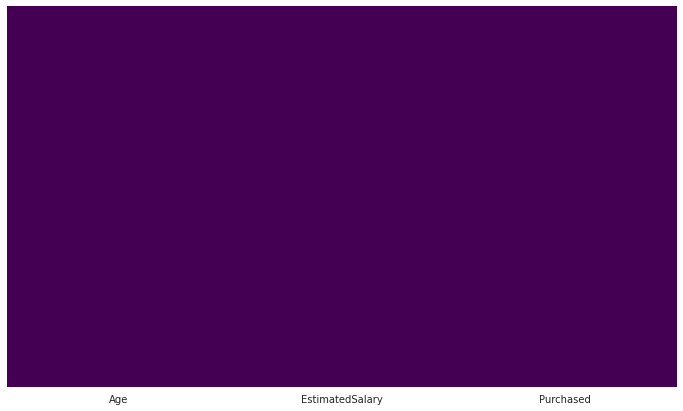

In [9]:
plt.figure(figsize=(12,7))
sns.heatmap(social_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# **Create X array & Y array**

In [11]:
X = social_data.iloc[:, [0, 1]].values
y = social_data.iloc[:, 2].values

# **Splitting the dataset into the Training set and Test set**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# **Check the length of test and train dataset**

In [13]:
print("Training Set of X:", len(X_train))
print("Testing Set of X:", len(X_test))
print("Training Set of y:", len(y_train))
print("Testing Set of y:", len(y_test))

Training Set of X: 300
Testing Set of X: 100
Training Set of y: 300
Testing Set of y: 100


# **Feature Scaling**

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Fitting the model**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric= 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

# **Predicting the Test set results**

In [16]:
y_pred = classifier.predict(X_test)

# **Confusion Matrix**

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


# **Visualising the Training set results**

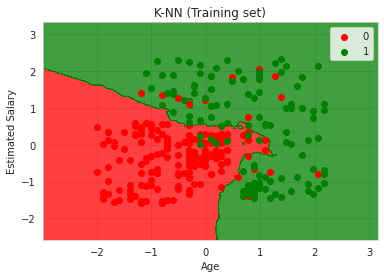

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# **Visualising the Test set results**

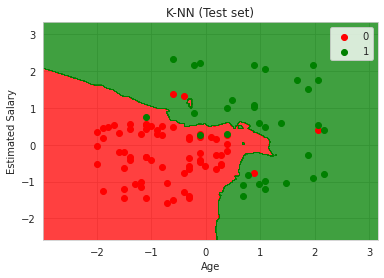

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# **Evaluate The Model**

In [21]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

**1. Classification Report**

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



**Accuracy**

In [25]:
print(accuracy_score(y_test,y_pred))

0.93


# **Determine k using elbow method**

**Elbow method helps data scientists to select the optimal number of clusters for KNN clustering.**

In [28]:
error_rate = []

for i in range(1,25):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,y_train)
    pred_i = classifier.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

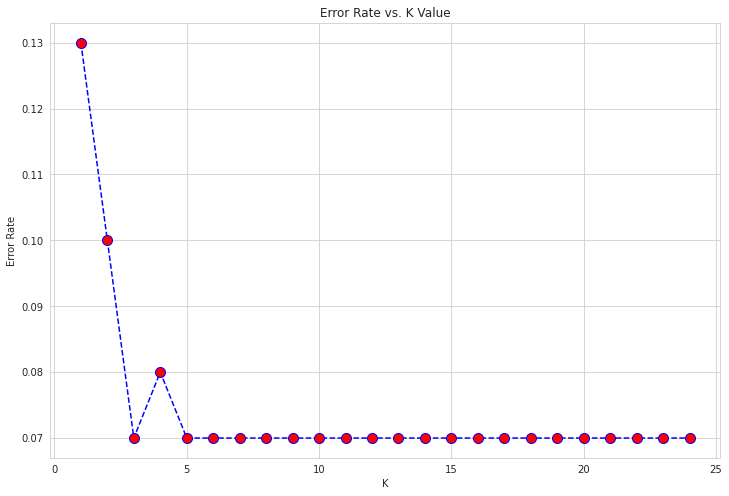

In [30]:
plt.figure(figsize=(12,8))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# **CONCLUSION :**

<B>The data visualization of the training set and test set is given above.<BR><BR> As k nearest neighbors is non-linear classifier, the graph is non-linear (curve).<BR><BR>The green dots shows the people buying the car whereas red dots shows the people not buying the car. <BR><BR>The green dots on the green region shows the true positive whereas the red dots on the red region shows the true negative.<BR><BR> The wrongly classified are the green dots in the red region (false negative) and the red dots in the green region (false positive).